### Load the dataset "supermarket_sales.csv"

In [40]:
import pandas as pd

#load the dataset
data = pd.read_csv("data/supermarket_sales.csv")

#display the first few rows using .head()
print(data.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29

## verification of csv using .shape

In [41]:
print("Shape of dataset:", data.shape)

Shape of dataset: (1000, 17)


### Basic exploration

In [42]:
# understand the data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [43]:
# check the missing values using .isnull()
print("missing values:", data.isnull().sum())

missing values: Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [44]:
# check for duplicate rows using '.duplicateted()'
print("Duplicate Rows:", data.duplicated().sum())

Duplicate Rows: 0


### Perform Exploratory Data Analysis

#### 1. General Analysis

In [45]:
# General sales analysis

#total sales
total_sales = data["Sales"].sum()
print("Total sales:", total_sales)

#Average Rating
avg_rating = data["Rating"].mean()
print("Average Rating:", avg_rating)



Total sales: 322966.749
Average Rating: 6.9727


#### 2. Branch and City Analysis

In [46]:
# sales by branch using '.groupby'
sales_by_branch = data.groupby("Branch")["Sales"].sum()
print(sales_by_branch)

Branch
Alex     106200.3705
Cairo    106197.6720
Giza     110568.7065
Name: Sales, dtype: float64


In [47]:
# sales by city using '.groupby'
sales_by_city = data.groupby("City")["Sales"].sum()
sales_by_city_sorted = sales_by_city.sort_values(ascending=False).reset_index()
print(sales_by_city_sorted)

        City        Sales
0  Naypyitaw  110568.7065
1     Yangon  106200.3705
2   Mandalay  106197.6720


#### 3. Product Line Performance

In [48]:
#total sales by product line or category of product
sales_by_product_line = data.groupby("Product line")["Sales"].sum()

# Reset the index to turn the product line into a column and sort by sales
sales_by_product_line_sorted = sales_by_product_line.sort_values(ascending=False).reset_index()

# Print the result
print(sales_by_product_line_sorted)

             Product line       Sales
0      Food and beverages  56144.8440
1       Sports and travel  55122.8265
2  Electronic accessories  54337.5315
3     Fashion accessories  54305.8950
4      Home and lifestyle  53861.9130
5       Health and beauty  49193.7390


### Visualization

#### Bar Plot: Sales By Product Line

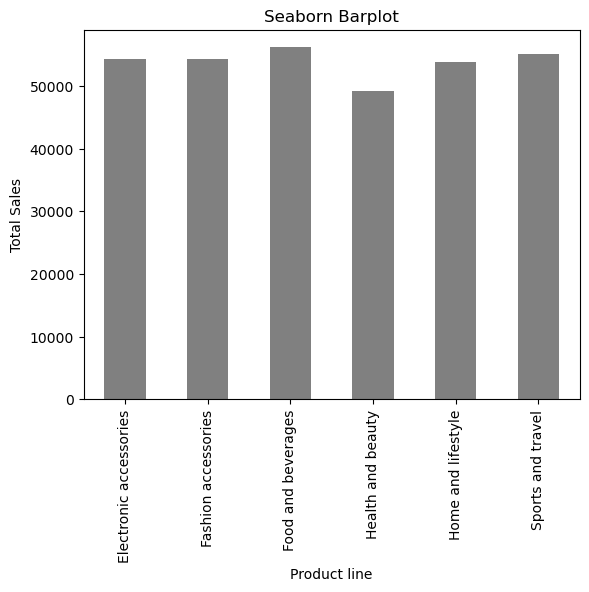

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# plot sales by product line
sales_by_product_line.plot(kind="bar", title="Sales by Product line",  color = "grey")
plt.ylabel("Total Sales")
 
# saving the chart as png
plt.title("Seaborn Barplot")
plt.savefig("visuals/sales by product line_barplot.png")  # Save as PNG
plt.show()
plt.close()

#### Pie Chart: Payment Method Distribution:

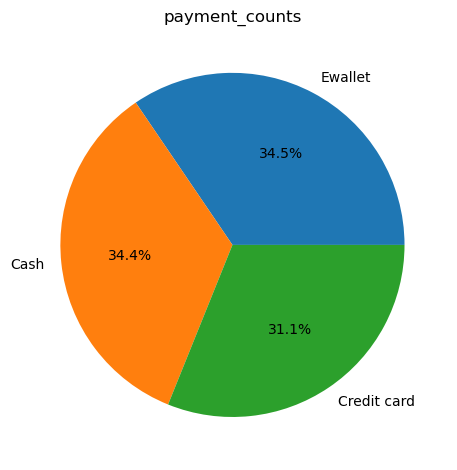

In [50]:
#counting different payment method
payment_counts = data["Payment"].value_counts()
 
# Pie chart
payment_counts.plot(kind="pie", autopct="%1.1f%%", title="Payment Method Distribution")
plt.ylabel("")

# saving the chart as png
plt.title("payment_counts")
plt.tight_layout()
plt.savefig("visuals/chart Payment Method Distribution.png")  # Save as PNG
plt.show()

### Time_series Analysis

In [57]:
#Analyse sales trends over time
print(data.columns)
#convert the date comun to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

#Date column as index for time series plotting
data.set_index('Date', inplace=True, drop=False)

#sales for 1st quarter of the year
monthly_sales = data.resample('M')['Sales'].sum()
print(monthly_sales)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')
Date
2019-01-31    116291.868
2019-02-28     97219.374
2019-03-31    109455.507
Freq: M, Name: Sales, dtype: float64


#### Monthly Sales trends

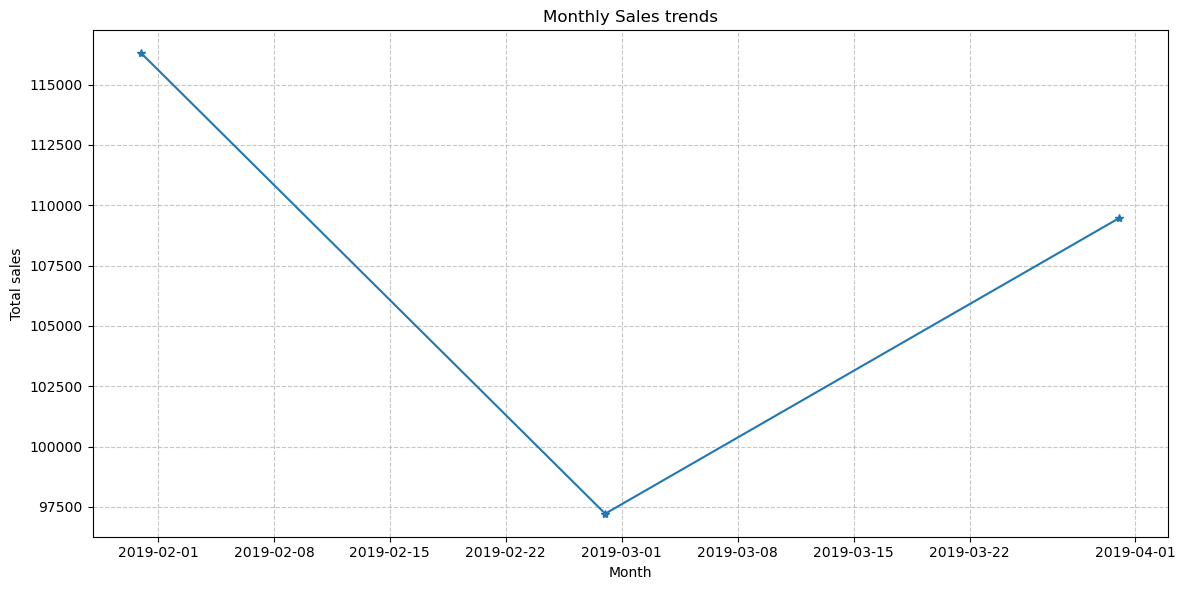

In [67]:
# Set the figure size for better visibility
plt.figure(figsize=(12, 6))

# plot the sales trends
plt.plot(monthly_sales.index, monthly_sales.values, marker='*')
plt.savefig("visuals/Monthly Sales trends.png")
plt.title("Monthly Sales trends")
plt.xlabel("Month")
plt.ylabel("Total sales")

# Add grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Save the plot as a high-quality image
plt.tight_layout()  # Adjust layout to prevent cropping
plt.savefig("visuals/Monthly_Sales_Trends.png", dpi=300, bbox_inches='tight')

# show and close the image
plt.show()
plt.close()

#### Customer Segmentation

Identfy which customer type and gender contributes more to sales

Group sales data by customer type

In [70]:
sales_by_customer_type = data.groupby('Customer type')['Sales'].sum()
print(sales_by_customer_type)

Customer type
Member    189694.764
Normal    133271.985
Name: Sales, dtype: float64


Group sales data by gender

In [71]:
sales_by_gender = data.groupby('Gender')['Sales'].sum()
print(sales_by_gender)

Gender
Female    194671.8375
Male      128294.9115
Name: Sales, dtype: float64


Visulalize the segmentation with bar plots 

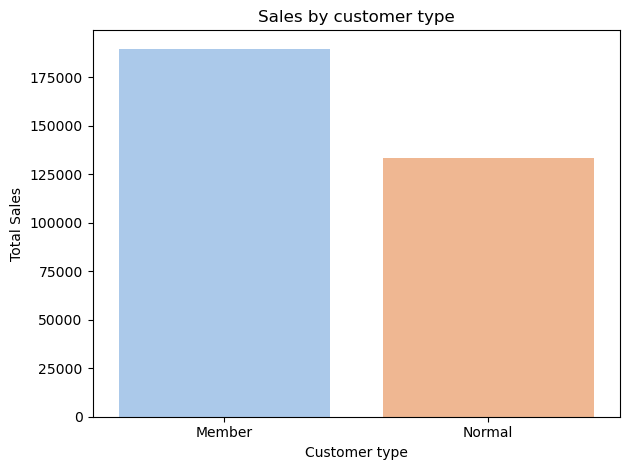

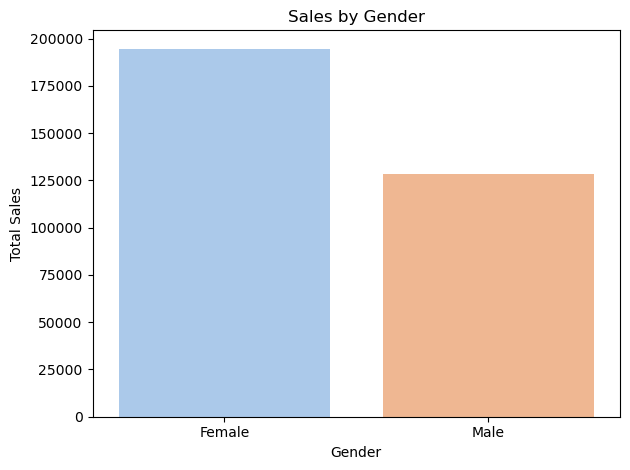

In [76]:
#Customer type
sns.barplot(x=sales_by_customer_type.index,y=sales_by_customer_type.values, palette="pastel")
plt.title("Sales by customer type")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("visuals/Bar chart Sales By Customer type.png")
plt.show()
plt.close()

#Gender
sns.barplot(x=sales_by_gender.index,y=sales_by_gender.values, palette="pastel")
plt.title("Sales by Gender")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.savefig("visuals/Bar chart Sales By Gender.png")
plt.show()
plt.close()

#### Predictive Analysis

A simple regression model to predict Gross Income based on Unit Price, Quantity and Product Line. 

*step:1* Encode Product Line(categorical column) into numerical format:

In [78]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Product line'] = encoder.fit_transform(data['Product line'])


*step:2* Select the features (Unit Price, Quantity, Product Line) and target (Gross Income):

In [84]:
X = data[['Unit price', 'Quantity', 'Product line']]
y = data['gross income']

#print(X)
#print(y)

*step:3* Split the data into training and testing sets:

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

*step:4* Train a linear regression model:

In [106]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

#evaluate the model
train_score = model.score(X_train,y_train)
test_score = model.score(X_test, y_test)

print("training Score:", train_score)
print("Test Score:", test_score)

training Score: 0.885998735654467
Test Score: 0.9042074852891806


*step:5* Evaluate the model

In [92]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-Squared Error:", r2)

Mean Squared Error: 14.13189528760674
R-Squared Error: 0.9042074852891806


*step:6* Predict new values: to predict Gross Income for a new data point:

In [130]:
new_data =[[20.5,1,2]] #(unit price, quantity, product line (encoded))
predicted_income = model.predict(new_data)
print("Predicted Gross Income:", predicted_income[0])

Predicted Gross Income: -6.9055921473348665


/Users/mainuddinrobin/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
